In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
import numpy as np
import glob
from scipy.stats import norm

In [21]:
#Sourcefile 1

direc_allday = '/Users/ujwalkumar/Desktop/Research/Systematic uncertainties/all day/'
direc_10min = '/Users/ujwalkumar/Desktop/Research/Systematic uncertainties/10 min/'
direc_simulated = '/Users/ujwalkumar/Desktop/Research/Systematic uncertainties/systematic/'

In [22]:
def calc_eta(I_v,s_v,N):
    avg_wI2 = (1/N)*np.sum((I_v**2)/(s_v**2))
    avg_wI_2 = ((1/N)*np.sum(I_v/s_v**2))**2
    w = (1/N)*np.sum(1/s_v**2)
    eta = (N/(N-1))*(avg_wI2-(avg_wI_2/w))
    return eta

# formulae w/ systematic uncertainties

def eta_unc(I_v,s_v,N,unc):
    s_v_new = np.sqrt((s_v)**2+(unc*I_v)**2)
    w_new = (1/N)*np.sum(1/s_v_new**2)
    avg_wI2_new = (1/N)*np.sum((I_v**2)/(s_v_new**2))
    avg_wI_2_new = ((1/N)*np.sum(I_v/s_v_new**2))**2
    eta_new = (N/(N-1))*(avg_wI2_new-(avg_wI_2_new/w_new))
    return eta_new

In [23]:
#Making a DataFrame
etas = pd.DataFrame()

#Running through files and pulling relevant columns
for file in glob.glob(direc_10min+'*.csv'):
    file_data = pd.read_csv(file)
    file_data.columns = [column.strip() for column in file_data.columns]
    
    I_v = file_data["f_int"]
    avg_I = np.sum(file_data["f_int"])/len(file_data["f_int"])
    s_v = file_data["f_int_err"]
    V_v = list(file_data["V_nu"])[-1]
    f_peak = list(file_data["f_peak"])[-1]
    N = len(file_data)
    Max_med = max(file_data["f_peak"])/np.median(file_data["f_peak"])
    
#Populating etas DataFrame
    etas.loc[file, "Eta Original"] = calc_eta(I_v,s_v,N)
    etas.loc[file, "Eta New 5"] = eta_unc(I_v,s_v,N,0.05)
    etas.loc[file, "Eta New 10"] = eta_unc(I_v,s_v,N,0.1)
    etas.loc[file, "Eta New 15"] = eta_unc(I_v,s_v,N,0.15)
    etas.loc[file, "Eta New 20"] = eta_unc(I_v,s_v,N,0.2)
    etas.loc[file, "Eta New 25"] = eta_unc(I_v,s_v,N,0.25)
    etas.loc[file, "Eta New 30"] = eta_unc(I_v,s_v,N,0.3)
    etas.loc[file, "Eta New 35"] = eta_unc(I_v,s_v,N,0.35)
    etas.loc[file, "Eta New 40"] = eta_unc(I_v,s_v,N,0.4)
    etas.loc[file, "Eta New 45"] = eta_unc(I_v,s_v,N,0.45)
    etas.loc[file, "Eta New 50"] = eta_unc(I_v,s_v,N,0.5)
    etas.loc[file, "Eta New 55"] = eta_unc(I_v,s_v,N,0.55)
    etas.loc[file, "Eta New 60"] = eta_unc(I_v,s_v,N,0.6)
    etas.loc[file, "Eta New 65"] = eta_unc(I_v,s_v,N,0.65)
    etas.loc[file, "Eta New 70"] = eta_unc(I_v,s_v,N,0.7)
    etas.loc[file, "Eta New 75"] = eta_unc(I_v,s_v,N,0.75)
    etas.loc[file, "Eta New 80"] = eta_unc(I_v,s_v,N,0.8)
    etas.loc[file, "Eta New 85"] = eta_unc(I_v,s_v,N,0.85)
    etas.loc[file, "Eta New 90"] = eta_unc(I_v,s_v,N,0.9)
    etas.loc[file, "Eta New 95"] = eta_unc(I_v,s_v,N,0.95)
    etas.loc[file, "Eta New 100"] = eta_unc(I_v,s_v,N,1)
    
    etas.loc[file,"V_v"] = V_v
    etas.loc[file,"f_peak"] = f_peak
    etas.loc[file,"Avg(I_v)"] = avg_I
    etas.loc[file,"Datapoints"] = str(N)
    etas.loc[file,"Max/Median"] = Max_med

Empty DataFrame
Columns: []
Index: []


In [5]:
# Limiting case for eta-V plot

x_model = np.sqrt(np.linspace(0,20))
y_model = (1/avg_I)*x_model

NameError: name 'avg_I' is not defined

In [9]:
# define power-law functions and minimizer

def powerlaw(t,N,alpha):
    func = N*(t)**alpha
    return func

def compute_chi_sq(data,model):
    best_fit = np.sum((model-data)**2) ##yerr = 1 for all points
    return best_fit

In [10]:
### Fitting a power-law (single break) to show flatness

chi_sq = 10000
Ns = np.linspace(0.01,10,num = 10)
alphas = np.linspace(-3,3,num = 10)
x = etas["f_peak"]

for N in Ns:
    for alpha in alphas:
        model = powerlaw(x,N,alpha)
        chi_sq_new = compute_chi_sq(etas["Eta Original"], model)
        if chi_sq_new < chi_sq:
            chi_sq = chi_sq_new
            reduced_chi = chi_sq_new/(len(x)-2)
            besta=alpha
            bestN=N
                
best_fit = chi_sq
model = powerlaw(x,bestN,besta)

print("Coefficent to powerlaw =", bestN,"with an index of ",besta)
print("The reduced chi-squared =", reduced_chi)

KeyError: 'f_peak'

In [15]:
#Colour map
cmap = plt.get_cmap('copper')

KeyError: 'Eta Original'

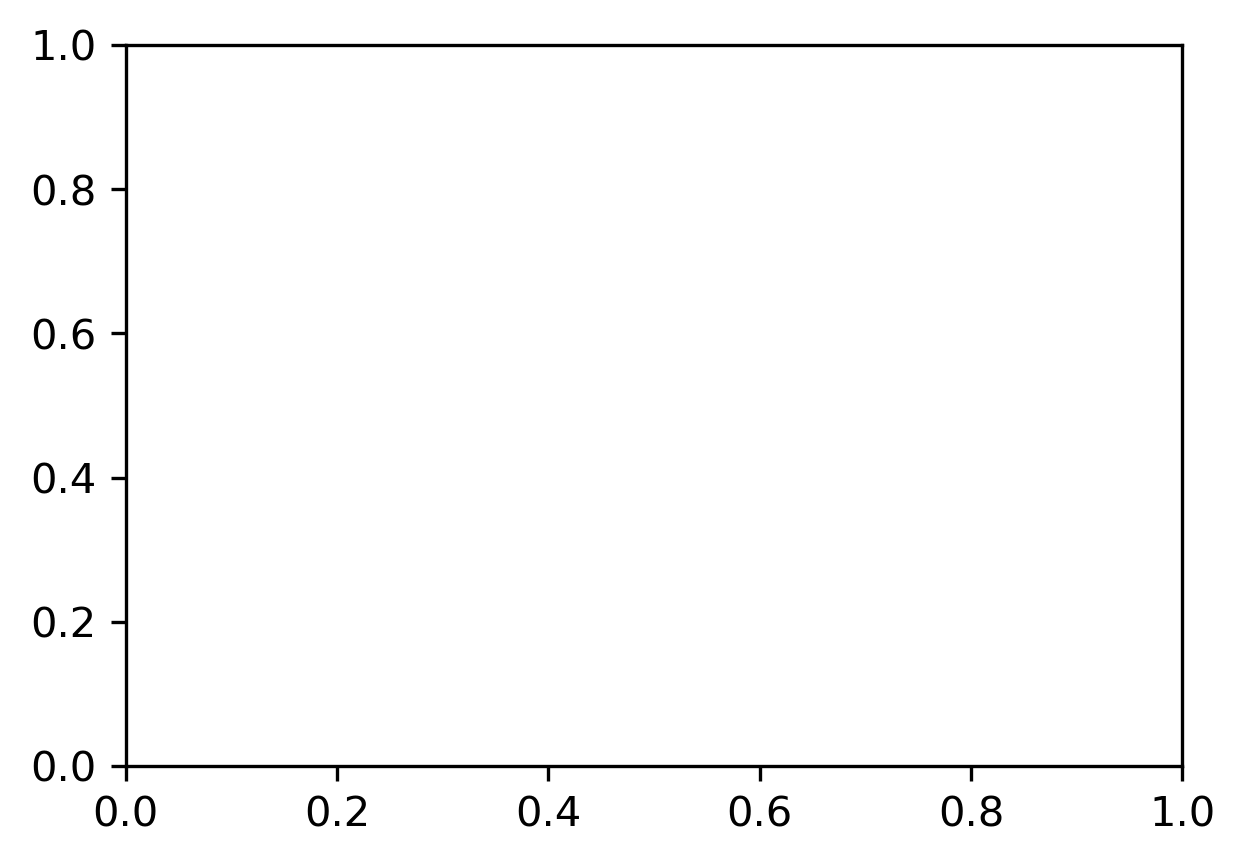

In [16]:
### Eta-V Plots

fig = plt.figure(figsize=(10,7), dpi=300, facecolor='w')


plt.subplot(2, 2, 1, aspect = 'auto')
plt.scatter(etas["Eta Original"], etas["V_v"],marker = '.',c = etas["Datapoints"].astype(int), cmap=cmap)
plt.loglog(x_model,y_model)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-1.8,10**2.3)
plt.ylim(10**-2,10**1)
plt.ylabel("$V_v$")
plt.title("V vs $\eta$")


plt.subplot(2, 2, 2, aspect = 'auto')
plt.scatter(etas["Eta New 10"], etas["V_v"],marker = '.', c = etas["Datapoints"].astype(int), cmap=cmap)
plt.loglog(x_model,y_model) # testing to see if the model fits the V ~ sqrt(N) relationship
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-1.8,10**2.3)
plt.ylim(10**-2,10**1)
plt.title("V vs $\eta$ (with 20% uncertainty)")
plt.colorbar()


plt.subplot(2, 2, 3, aspect = 'auto')
plt.scatter(etas["Eta New 50"], etas["V_v"],marker = '.', c = etas["Datapoints"].astype(int), cmap=cmap)
plt.loglog(x_model,y_model)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-1.8,10**2.3)
plt.ylim(10**-2,10**1)
plt.xlabel("$\eta$")
plt.ylabel("V")
plt.title("V vs $\eta$ (with 50% uncertainty)")

plt.subplot(2, 2, 4, aspect = 'auto')
plt.scatter(etas["Eta New 100"], etas["V_v"],marker = '.', c = etas["Datapoints"].astype(int), cmap=cmap)
plt.loglog(x_model,y_model)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-1.8,10**2.3)
plt.ylim(10**-2,10**1)
plt.xlabel("$\eta$ with Uncertainty")
plt.title("V vs $\eta$ (with 100% uncertainty)")
plt.colorbar()


plt.show()

KeyError: 'f_peak'

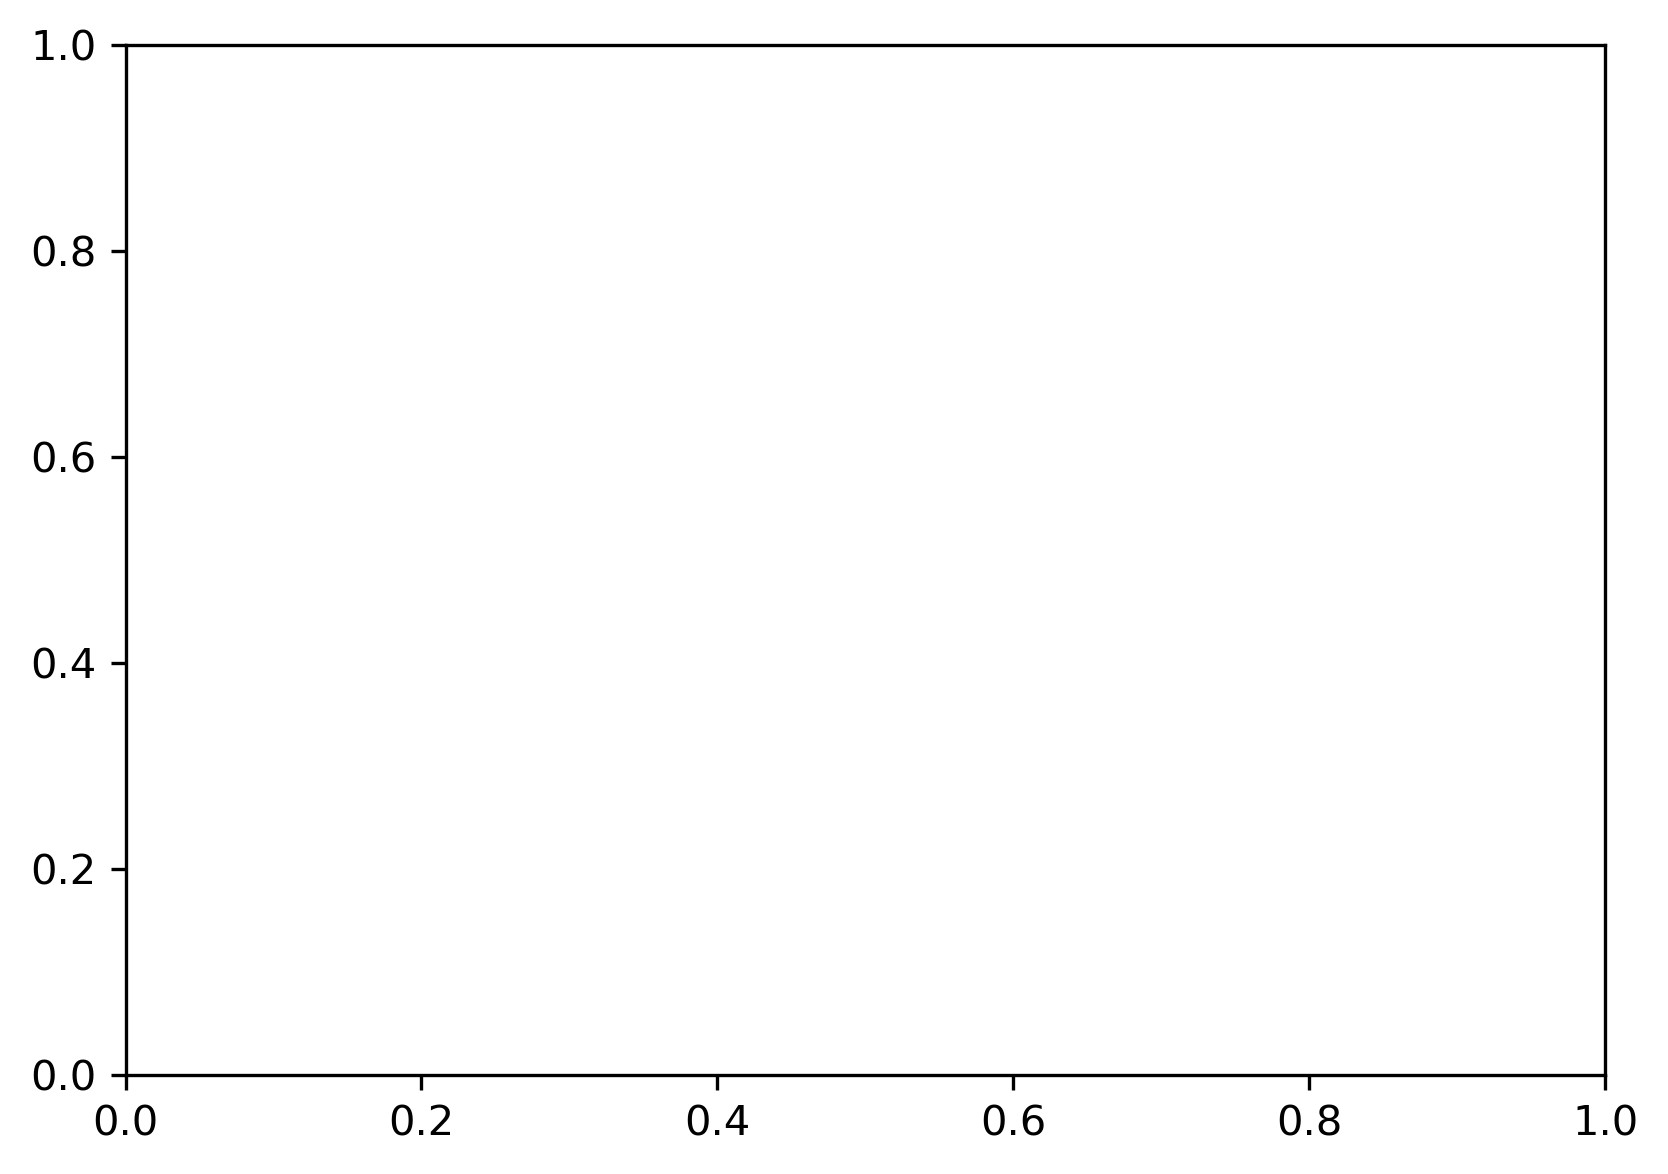

In [17]:
#Eta-Max Flux

fig = plt.figure(figsize=(14,10), dpi=300, facecolor='w')

plt.subplot(2, 2, 1)
plt.scatter(etas["f_peak"], etas["Eta Original"],marker = '.',c = etas["Datapoints"].astype(int),cmap=cmap)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-3,10**0.5)
plt.ylim(10**-1.3,10**3)
plt.ylabel("$\eta$")
plt.title("Peak flux vs $\eta$")


plt.subplot(2, 2, 2)
plt.scatter(etas["f_peak"], etas["Eta New 10"],marker = '.', c = etas["Datapoints"].astype(int), cmap=cmap)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-3,10**0.5)
plt.ylim(10**-1.3,10**3)
plt.title("Peak flux vs. $\eta$ (w/ 10% uncertainty)")
plt.colorbar()


plt.subplot(2, 2, 3)
plt.scatter(etas["f_peak"], etas["Eta New 20"],marker = '.', c = etas["Datapoints"].astype(int), cmap=cmap)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-3,10**0.5)
plt.ylim(10**-1.3,10**3)
plt.xlabel("Max Flux")
plt.ylabel("$\eta$")
plt.title("Peak flux vs. $\eta$ (w/ 20% uncertainty)")

plt.subplot(2, 2, 4)
plt.scatter(etas["f_peak"], etas["Eta New 75"],marker = '.', c = etas["Datapoints"].astype(int), cmap=cmap)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-3,10**0.5)
plt.ylim(10**-1.3,10**3)
plt.xlabel("Max Flux")
plt.title("Peak flux vs. $\eta$ (w/ 75% uncertainty)")
plt.colorbar()


plt.show()

In [ ]:
fig = plt.figure(figsize=(14,10), dpi=300, facecolor='w')
grid = plt.GridSpec(4,4,hspace=0.5,wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])

x = etas["f_peak"]
y = etas["Eta Original"]

ax_main.scatter(x,y,marker = ".")
ax_main.set_xlim(10**-4,10**4)
ax_main.set_ylim(10**-4,10**4)
ax_main.set_xscale('log')
ax_main.set_yscale('log')

logbins_right = np.logspace(np.log10(min(y)), np.log10(max(y)),10)

ax_right.hist(y, normed = True, bins = logbins_right, orientation = 'horizontal')

(mu, sigma) = scipy.stats.norm.fit(np.log10(y))
best_fit_line = scipy.stats.norm.pdf(logbins_right, mu, sigma)

ax_right.plot(best_fit_line,logbins_right)
ax_right.invert_yaxis()
ax_right.set_ylim(ax_main.get_ylim())
ax_right.set_yscale('log')
ax_right.set_yticklabels([])

ax_main.title.set_text("Peak Flux vs $\eta_v$ (100% added systematic uncertainty) with Distribution of $\eta_v$")
ax_main.set_xlabel("Peak Flux (Jy)")
ax_main.set_ylabel("$\eta_v$")
plt.show()

print(mu, sigma)

In [ ]:
### Values of Spread vs Percentage uncertainty

percentages = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

(mu1, sigma1) = scipy.stats.norm.fit(np.log10(etas["Eta Original"]))
(mu2, sigma2) = scipy.stats.norm.fit(np.log10(etas["Eta New 5"]))
(mu3, sigma3) = scipy.stats.norm.fit(np.log10(etas["Eta New 10"]))
(mu4, sigma4) = scipy.stats.norm.fit(np.log10(etas["Eta New 15"]))
(mu5, sigma5) = scipy.stats.norm.fit(np.log10(etas["Eta New 20"]))
(mu6, sigma6) = scipy.stats.norm.fit(np.log10(etas["Eta New 25"]))
(mu7, sigma7) = scipy.stats.norm.fit(np.log10(etas["Eta New 30"]))
(mu8, sigma8) = scipy.stats.norm.fit(np.log10(etas["Eta New 35"]))
(mu9, sigma9) = scipy.stats.norm.fit(np.log10(etas["Eta New 40"]))
(mu10, sigma10) = scipy.stats.norm.fit(np.log10(etas["Eta New 45"]))
(mu11, sigma11) = scipy.stats.norm.fit(np.log10(etas["Eta New 50"]))
(mu12, sigma12) = scipy.stats.norm.fit(np.log10(etas["Eta New 55"]))
(mu13, sigma13) = scipy.stats.norm.fit(np.log10(etas["Eta New 60"]))
(mu14, sigma14) = scipy.stats.norm.fit(np.log10(etas["Eta New 65"]))
(mu15, sigma15) = scipy.stats.norm.fit(np.log10(etas["Eta New 70"]))
(mu16, sigma16) = scipy.stats.norm.fit(np.log10(etas["Eta New 75"]))
(mu17, sigma17) = scipy.stats.norm.fit(np.log10(etas["Eta New 80"]))
(mu18, sigma18) = scipy.stats.norm.fit(np.log10(etas["Eta New 85"]))
(mu19, sigma19) = scipy.stats.norm.fit(np.log10(etas["Eta New 90"]))
(mu20, sigma20) = scipy.stats.norm.fit(np.log10(etas["Eta New 95"]))
(mu21, sigma21) = scipy.stats.norm.fit(np.log10(etas["Eta New 100"]))

sigmas = [sigma1, sigma2, sigma3, sigma4, sigma5, sigma6, sigma7, sigma8, sigma9, sigma10, sigma11, sigma12, sigma13, sigma14, sigma15, sigma16, sigma17, sigma18, sigma19, sigma20, sigma21]

fig = plt.figure(figsize=(5,3), dpi=300, facecolor='w')
plt.xlabel("Systematic uncertainty added to $\eta_v$")
plt.xticks(np.arange(0, 100, step=10))
plt.ylabel("$\sigma$ of Gaussian Fit")
plt.title("$\sigma$ of Gaussian Fits to $\eta_v$ with Uncertainties")
plt.axhline(y=0.295, color='r', linestyle='-', linewidth = 0.6)
plt.plot(percentages, sigmas, linestyle='--', marker='.', color='b')

In [ ]:
#Eta-Max/Median Flux

fig = plt.figure(figsize=(12,10), dpi=300, facecolor='w')

plt.subplot(2, 2, 1)
plt.scatter(etas["Max/Median"], etas["Eta Original"],marker = '.',c = etas["Datapoints"].astype(int), cmap=cmap)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-0.3,10**1)
plt.ylim(10**-3,10**2.2)
plt.ylabel("$\eta$")
plt.title("Max/Median vs Eta")


plt.subplot(2, 2, 2)
plt.scatter(etas["Max/Median"], etas["Eta New 10"],marker = '.', c = etas["Datapoints"].astype(int), cmap=cmap)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-0.3,10**1)
plt.ylim(10**-3,10**2.2)
plt.title("Max/Median vs Eta (w/ 10% uncertainty)")
plt.colorbar()


plt.subplot(2, 2, 3)
plt.scatter(etas["Max/Median"], etas["Eta New 50"],marker = '.', c = etas["Datapoints"].astype(int), cmap=cmap)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-0.3,10**1)
plt.ylim(10**-3,10**2.2)
plt.xlabel("Max/Median Flux")
plt.ylabel("Eta (w/unc)")
plt.title("Max/Median vs Eta (w/ 50% uncertainty)")

plt.subplot(2, 2, 4)
plt.scatter(etas["Max/Median"], etas["Eta New 100"],marker = '.', c = etas["Datapoints"].astype(int), cmap=cmap)
plt.xscale("log")
plt.yscale("log")
plt.xlim(10**-0.3,10**1)
plt.ylim(10**-2,10**1)
plt.xlabel("Max/Median Flux")
plt.title("Max/Median vs Eta (w/ 100% uncertainty)")
plt.colorbar()


plt.show()